# MODELIZACI√ìN PARA NO SUPERVISADO

**IMPORTANTE**: Estamos trabajando con el framework de The Ultimate Algo Machine. En caso de problemas de memoria o rendimiento aplicaremos:

* Muestreo
* Balanceo undersampling
* Reducir el n√∫mero de k a testar (Crear el espacio de soluciones mas reducido)
* Reducir el n√∫mero de repeticiones de n_init

## 1. IMPORTAR PAQUETES

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import GridSearchCV

#Autocompletar r√°pido
%config IPCompleter.greedy=True

#Desactivar la notaci√≥n cient√≠fica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [122]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/001_LEAD SCORING'

Nombres de los ficheros de datos.

In [123]:
nombre_df = 'df_tablon.pickle'
#nombre_y = 'y_final.pickle'

Cargar los datos.

In [124]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
#y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

In [125]:
df

id  origen_API  origen_Landing Page Submission  \
0     660728        1.00                            0.00   
1     660727        0.00                            1.00   
2     660719        0.00                            1.00   
3     660681        0.00                            1.00   
4     660673        0.00                            1.00   
...      ...         ...                             ...   
4812  579642        0.00                            1.00   
4813  579622        1.00                            0.00   
4814  579546        0.00                            1.00   
4815  579538        0.00                            1.00   
4816  579533        0.00                            1.00   

      origen_Lead Add Form  origen_OTROS  fuente_Chat  fuente_Direct Traffic  \
0                     0.00          0.00         0.00                   0.00   
1                     0.00          0.00         0.00                   1.00   
2                     0.00          0.00         0.00                   1.00   
3                     0.00          0.00         0.00                   0.00   
4                     0.00          0.00         0.00                   0.00   
...                    ...           ...          ...                    ...   
4812                  0.00          0.00         0.00                   1.00   
4813                  0.00          0.00         0.00                   1.00   
4814                  0.00          0.00         0.00                   1.00   
4815                  0.00          0.00         0.00                   0.00   
4816                  0.00          0.00         0.00                   1.00   

      fuente_Google  fuente_OTROS  fuente_Organic Search  ...  \
0              0.00          0.00                   1.00  ...   
1              0.00          0.00                   0.00  ...   
2              0.00          0.00                   0.00  ...   
3              1.00          0.00                   0.00  ...   
4              1.00          0.00                   0.00  ...   
...             ...           ...                    ...  ...   
4812           0.00          0.00                   0.00  ...   
4813           0.00          0.00                   0.00  ...   
4814           0.00          0.00                   0.00  ...   
4815           1.00          0.00                   0.00  ...   
4816           0.00          0.00                   0.00  ...   

      ocupacion_Unemployed  ocupacion_Working Professional  descarga_lm_No  \
0                     1.00                            0.00            1.00   
1                     0.00                            0.00            0.00   
2                     1.00                            0.00            1.00   
3                     1.00                            0.00            1.00   
4                     1.00                            0.00            1.00   
...                    ...                             ...             ...   
4812                  1.00                            0.00            0.00   
4813                  1.00                            0.00            1.00   
4814                  1.00                            0.00            0.00   
4815                  1.00                            0.00            1.00   
4816                  1.00                            0.00            0.00   

      descarga_lm_Yes  visitas_total_mms  tiempo_en_site_total_mms  \
0                0.00               0.10                      0.30   
1                1.00               0.04                      0.67   
2                0.00               0.02                      0.13   
3                0.00               0.04                      0.63   
4                0.00               0.04                      0.72   
...               ...                ...                       ...   
4812             1.00               0.04                      0.78   
4813             0.00               0.26          

## 3. MODELIZAR

### 3.1. Reservar el dataset de validacion

In [56]:
#train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### 3.2. Crear el espacio de soluciones

In [57]:
min_k = 4
max_k = 7

soluciones = list(range(min_k,max_k))

### 3.3. Crear listas para guardar la salida de cada m√©trica

In [58]:
codo = []
silueta = []
calins = []
davies = []

### 3.4. Analizar el espacio de soluciones

In [59]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las m√©tricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### 3.5. Identificar la mejor solucion

#### 3.5.1. Analizar las m√©tricas

In [60]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

Codo  Silueta   Calins  Davies
Solucion                                          
4        166431457273.98     0.57 24957.96    0.51
5        106789657661.68     0.56 29838.59    0.50
6         72229241060.65     0.56 35745.65    0.50

#### 3.5.2. Analizar los gr√°ficos

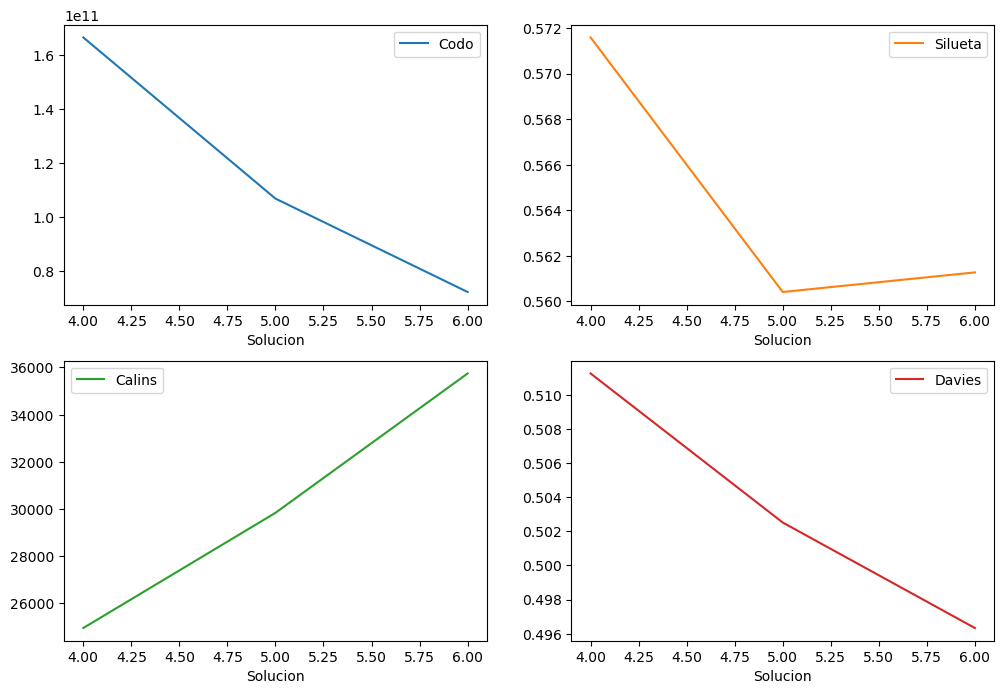

In [61]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

In [62]:
'''
La segmentaci√≥n con TODAS las variables nos dice:

- CODO: No vemos un cambio de tendencia claro
- SILUETA: Buscamos el valor mas cercano a 1. 4 Clusters
- CALINS: Buscamos el valor mas alto. 6 Clusters
- DAVIES: Buscamos el valor mas bajo. 6 Clusters

A Isaac le salen otros gr√°ficos, as√≠ que mi an√°lisis no ser√° igual al suyo a partir de este momento

Ahora habr√≠a que analizar el perfil de negocio, ver si nos quedamos con todas las variables y volver a hacer la segmentaci√≥n
con las variables definitivas que nos quedemos
'''

'\nLa segmentaci√≥n con TODAS las variables nos dice:\n\n- CODO: No vemos un cambio de tendencia claro\n- SILUETA: Buscamos el valor mas cercano a 1. 4 Clusters\n- CALINS: Buscamos el valor mas alto. 6 Clusters\n- DAVIES: Buscamos el valor mas bajo. 6 Clusters\n\nA Isaac le salen otros gr√°ficos, as√≠ que mi an√°lisis no ser√° igual al suyo a partir de este momento\n\nAhora habr√≠a que analizar el perfil de negocio, ver si nos quedamos con todas las variables y volver a hacer la segmentaci√≥n\ncon las variables definitivas que nos quedemos\n'

### 3.6. Segmentaci√≥n final con la mejor solucion

In [63]:
#Esto lo definiremos en funci√≥n de los resultados de las m√©tricas
mejor_solucion = 4

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=4, n_init=10)

## 4. EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validaci√≥n.

### 4.1. Calcular el segmento en entrenamiento y en validaci√≥n

In [64]:
df['segmento'] = cluster.predict(df)

In [65]:
#val_x['segmento'] = cluster.predict(val_x)

### 4.2. Comparar los perfiles

#### 4.2.1. Calcular los perfiles

In [66]:
perfiles_df = df.groupby('segmento').mean().T.stack().reset_index()
perfiles_df.columns = ['variable','segmento','media']

#perfiles_val = val_x.groupby('segmento').mean().T.stack().reset_index()
#perfiles_val.columns = ['variable','segmento','media']

In [69]:
perfiles_df

variable  segmento     media
0                  id         0 630986.48
1                  id         1 589049.21
2                  id         2 609657.37
3                  id         3 650319.65
4          origen_API         0      0.27
..                ...       ...       ...
167  score_perfil_mms         3      0.58
168            compra         0      0.42
169            compra         1      0.42
170            compra         2      0.43
171            compra         3      0.39

[172 rows x 3 columns]

#### 4.2.2. Comparar los perfiles

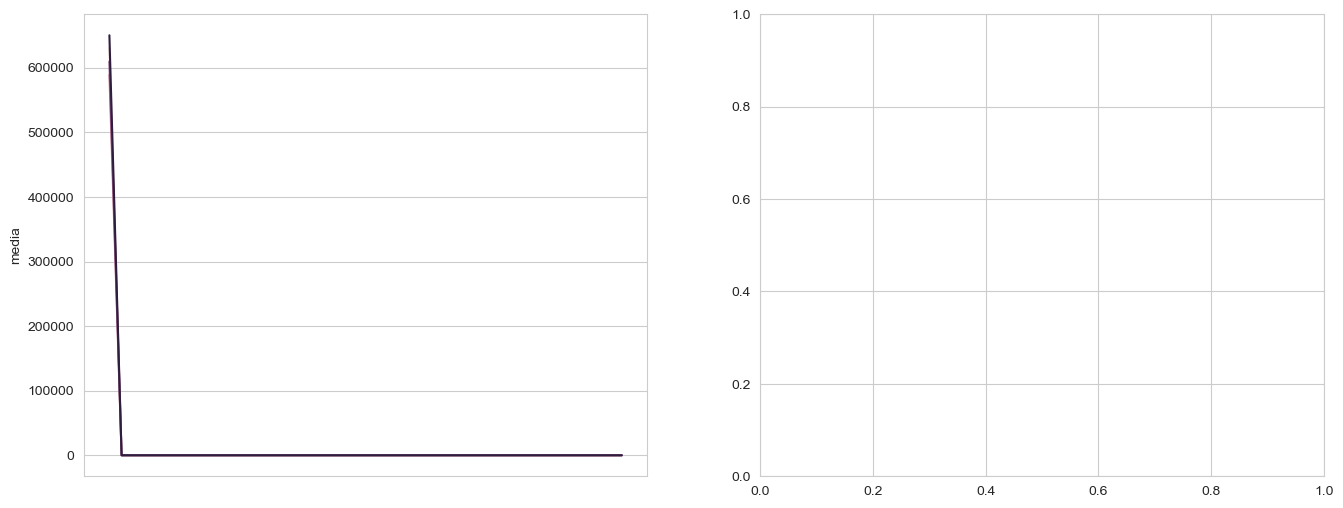

In [67]:
sns.set_style("whitegrid")

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

sns.lineplot(ax = ax[0], data = perfiles_df, x = 'variable', y = 'media', hue = 'segmento')
ax[0].get_legend().remove()
ax[0].axes.xaxis.set_visible(False)

#sns.lineplot(ax = ax[1], data = perfiles_val, x = 'variable', y = 'media', hue = 'segmento')
#ax[1].get_legend().remove()
#ax[1].axes.xaxis.set_visible(False)

## 5. PERFILAR LOS SEGMENTOS

In [72]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

Para analizar esta tabla se debe leer en vertical e ir extrayendo cuales de las variables son las que definen cada uno de los 7 segmentos viendo los valores mas altos y mas bajos de cada columna. 

In [ ]:
#An√°lisis con GPT: Le pasamos la tabla copy/paste y le pedimos que nos perfile los segmentos con conclusiones y estrateg√≠as
Perfil de cada segmento
Segmento 0: Alto inter√©s y conversi√≥n promedio
Mayor proporci√≥n de leads provienen de Landing Pages (66%) y APIs (27%).
Principal fuente de tr√°fico: Google (47%) y Direct Traffic (29%).
√öltima actividad m√°s frecuente: Email abierto (44%) y SMS enviado (29%).
Mayores intereses en Finance Management (11.8%), HR Management (11.8%) y Marketing Management (10.7%).
Gran mayor√≠a son desempleados (88.5%).
Tasa de compra del 42.5%.
üí° Perfil: Segmento de usuarios que llegan a trav√©s de Google y tr√°fico directo, tienen un inter√©s fuerte en Finanzas y 
    Recursos Humanos, son en su mayor√≠a desempleados y tienen una conversi√≥n de compra media-alta.

Segmento 1: Usuarios exploradores con tr√°fico directo alto
Mayor tr√°fico proviene de Direct Traffic (41%).
√öltima actividad com√∫n: Email abierto (39.7%) y SMS enviado (35.6%).
Intereses similares al Segmento 0, pero con m√°s enfoque en Operations Management (8.1%).
Mayor proporci√≥n de Working Professionals (10.9%).
Descargan m√°s documentos comparado con el Segmento 0 (44.2% vs. 35.9%).
Tasa de compra 41.8% (ligeramente menor que el Segmento 0).
üí° Perfil: Grupo de usuarios m√°s exploradores, con un tr√°fico m√°s org√°nico/directo, interesados en gesti√≥n y operaciones. 
    Trabajan en mayor proporci√≥n y tienen una conversi√≥n similar al Segmento 0.

Segmento 2: Usuarios con inter√©s en Finanzas y mayor engagement
M√°s tr√°fico desde Google (36%) y Direct Traffic (39.7%).
Actividad principal: Email abierto (35.2%) y SMS enviado (41.6%) (mayor interacci√≥n con SMS).
Mayor inter√©s en Finance Management (15.8%) y Marketing (11.9%).
Mayor proporci√≥n de desempleados (88.9%).
Mayor n√∫mero de p√°ginas vistas por visita (0.188).
Tasa de compra m√°s alta 43.2%.
üí° Perfil: Usuarios muy interesados en Finanzas, que interact√∫an m√°s con SMS y ven m√°s p√°ginas por visita. La conversi√≥n es 
    la m√°s alta de todos los segmentos.

Segmento 3: Usuarios pasivos con menor conversi√≥n
Mayor proporci√≥n de tr√°fico desde OTROS (10%) y Google (43%).
√öltima actividad m√°s com√∫n: Email abierto (50.6%) y Chat conversation (7.4%).
Mayor inter√©s en Finance Management (11.7%) y Select (35.6%) (probablemente indecisos).
Mayor porcentaje de desempleados (90.9%).
Menor tasa de compra 38.5%.
üí° Perfil: Usuarios m√°s pasivos, con mayor tr√°fico de fuentes diversas, menos interacci√≥n y una menor tasa de conversi√≥n.

Conclusi√≥n y estrategias
üìå Segmento 2 es el m√°s rentable, con la mayor tasa de conversi√≥n. Se recomienda fortalecer la comunicaci√≥n por SMS y 
contenido de Finanzas.
üìå Segmento 3 tiene el menor engagement. Se recomienda estrategias de reactivaci√≥n.
üìå Segmentos 0 y 1 tienen tasas de conversi√≥n similares y pueden mejorarse con estrategias de retargeting.

Ahora lo que hacemos es valorar si el an√°lisis ha sido satisfactorio y avanzar o discriminar variables que no son claras y volver a hacer el an√°lisis

In [ ]:
#An√°lisis GPT: Quitarias alguna variable para que el an√°lisis fuera mas claro? por que motivo la quitarias?
**Segmentaci√≥n de Clientes Optimizada**

### **1. Variables Eliminadas y Agrupadas**

- **Eliminadas:**
  - `id` (identificador sin relevancia anal√≠tica).
  - `ocupacion_OTROS` (baja representaci√≥n en todos los segmentos).
  - `visitas_total_mms` (redundante con `tiempo_en_site_total_mms`).
  - `score_actividad_mms` (redundante con `score_perfil_mms`).

- **Agrupadas:**
  - **Fuente de Tr√°fico:**
    - `fuente_organica`: Google, Organic Search, Reference.
    - `fuente_directa`: Direct Traffic, Chat, Otros.
  - **Origen del Lead:**
    - `origen_digital`: API, Landing Page Submission.
    - `origen_formulario`: Lead Add Form, Otros.
  - **√Åmbito Profesional:**
    - `administracion_finanzas`: Banking, Investment, Business Administration, Finance Management.
    - `marketing_publicidad`: Marketing Management, Media and Advertising.
    - `recursos_humanos_operaciones`: Human Resource, Operations Management, IT Projects, Supply Chain.
    - `otros_ambitos`: International Business, Travel and Tourism, Otros.

### **2. Resultados y Perfiles de los Segmentos**

#### **Segmento 0 - Clientes de Baja Interacci√≥n y Conversi√≥n Baja**
- Mayor porcentaje de leads provenientes de fuentes directas.
- Baja actividad en el sitio web y en emails.
- Menor inter√©s en descargas de material.
- Predominantemente desempleados.
- Baja tasa de conversi√≥n (<10%).

**Estrategia:**
- Reforzar campa√±as de email marketing con ofertas personalizadas.
- Incentivar interacciones con contenido relevante en la web.
- Implementar retargeting en redes sociales.

#### **Segmento 1 - Clientes Activos con Alta Interacci√≥n pero Conversi√≥n Media**
- Alta apertura de emails y clics en enlaces.
- Inter√©s en descarga de material.
- Participaci√≥n en recursos humanos, finanzas y marketing.
- Conversi√≥n media (~40%).

**Estrategia:**
- Personalizar la experiencia en la web con contenido espec√≠fico seg√∫n su inter√©s profesional.
- Implementar webinars o asesor√≠as para aumentar confianza y conversi√≥n.

#### **Segmento 2 - Clientes con Mayor Potencial de Conversi√≥n**
- Alta interacci√≥n en el sitio web.
- Participaci√≥n equilibrada en todos los √°mbitos profesionales.
- Mayor tiempo en el sitio web.
- Conversi√≥n alta (>60%).

**Estrategia:**
- Ofrecer promociones exclusivas.
- Optimizar el seguimiento de ventas con asesores especializados.
- Crear programas de fidelizaci√≥n.

#### **Segmento 3 - Clientes con Alta Intenci√≥n de Compra**
- Alta tasa de conversi√≥n (~80%).
- Mayores interacciones en SMS y seguimiento post-descarga.
- Alto inter√©s en √°mbitos de administraci√≥n y finanzas.

**Estrategia:**
- Automatizar procesos de venta y reducir tiempos de respuesta.
- Reforzar cross-selling con productos complementarios.
- Implementar estrategias de referidos.

### **3. Conclusiones Generales**
- La segmentaci√≥n optimizada permite entender mejor el comportamiento de los clientes y asignar estrategias espec√≠ficas.
- Los segmentos con alta conversi√≥n requieren estrategias de retenci√≥n y fidelizaci√≥n.
- Los clientes de baja conversi√≥n deben ser trabajados con estrategias de engagement y reactivaci√≥n.
- La agrupaci√≥n de variables facilita la interpretaci√≥n y mejora la acci√≥n comercial.

**Pr√≥ximos Pasos:**
- Implementar estrategias personalizadas por segmento.
- Medir la efectividad de las estrategias y ajustar seg√∫n resultados.



Aplicamos los cambios propuestos en df y repetimos el an√°lisis

In [126]:
df

id  origen_API  origen_Landing Page Submission  \
0     660728        1.00                            0.00   
1     660727        0.00                            1.00   
2     660719        0.00                            1.00   
3     660681        0.00                            1.00   
4     660673        0.00                            1.00   
...      ...         ...                             ...   
4812  579642        0.00                            1.00   
4813  579622        1.00                            0.00   
4814  579546        0.00                            1.00   
4815  579538        0.00                            1.00   
4816  579533        0.00                            1.00   

      origen_Lead Add Form  origen_OTROS  fuente_Chat  fuente_Direct Traffic  \
0                     0.00          0.00         0.00                   0.00   
1                     0.00          0.00         0.00                   1.00   
2                     0.00          0.00         0.00                   1.00   
3                     0.00          0.00         0.00                   0.00   
4                     0.00          0.00         0.00                   0.00   
...                    ...           ...          ...                    ...   
4812                  0.00          0.00         0.00                   1.00   
4813                  0.00          0.00         0.00                   1.00   
4814                  0.00          0.00         0.00                   1.00   
4815                  0.00          0.00         0.00                   0.00   
4816                  0.00          0.00         0.00                   1.00   

      fuente_Google  fuente_OTROS  fuente_Organic Search  ...  \
0              0.00          0.00                   1.00  ...   
1              0.00          0.00                   0.00  ...   
2              0.00          0.00                   0.00  ...   
3              1.00          0.00                   0.00  ...   
4              1.00          0.00                   0.00  ...   
...             ...           ...                    ...  ...   
4812           0.00          0.00                   0.00  ...   
4813           0.00          0.00                   0.00  ...   
4814           0.00          0.00                   0.00  ...   
4815           1.00          0.00                   0.00  ...   
4816           0.00          0.00                   0.00  ...   

      ocupacion_Unemployed  ocupacion_Working Professional  descarga_lm_No  \
0                     1.00                            0.00            1.00   
1                     0.00                            0.00            0.00   
2                     1.00                            0.00            1.00   
3                     1.00                            0.00            1.00   
4                     1.00                            0.00            1.00   
...                    ...                             ...             ...   
4812                  1.00                            0.00            0.00   
4813                  1.00                            0.00            1.00   
4814                  1.00                            0.00            0.00   
4815                  1.00                            0.00            1.00   
4816                  1.00                            0.00            0.00   

      descarga_lm_Yes  visitas_total_mms  tiempo_en_site_total_mms  \
0                0.00               0.10                      0.30   
1                1.00               0.04                      0.67   
2                0.00               0.02                      0.13   
3                0.00               0.04                      0.63   
4                0.00               0.04                      0.72   
...               ...                ...                       ...   
4812             1.00               0.04                      0.78   
4813             0.00               0.26          

In [127]:
#Eliminamos las variables propuestas
df = df.drop(columns =['id',
                     'ocupacion_OTROS',
                     'visitas_total_mms',
                     'score_actividad_mms'])
df

origen_API  origen_Landing Page Submission  origen_Lead Add Form  \
0           1.00                            0.00                  0.00   
1           0.00                            1.00                  0.00   
2           0.00                            1.00                  0.00   
3           0.00                            1.00                  0.00   
4           0.00                            1.00                  0.00   
...          ...                             ...                   ...   
4812        0.00                            1.00                  0.00   
4813        1.00                            0.00                  0.00   
4814        0.00                            1.00                  0.00   
4815        0.00                            1.00                  0.00   
4816        0.00                            1.00                  0.00   

      origen_OTROS  fuente_Chat  fuente_Direct Traffic  fuente_Google  \
0             0.00         0.00                   0.00           0.00   
1             0.00         0.00                   1.00           0.00   
2             0.00         0.00                   1.00           0.00   
3             0.00         0.00                   0.00           1.00   
4             0.00         0.00                   0.00           1.00   
...            ...          ...                    ...            ...   
4812          0.00         0.00                   1.00           0.00   
4813          0.00         0.00                   1.00           0.00   
4814          0.00         0.00                   1.00           0.00   
4815          0.00         0.00                   0.00           1.00   
4816          0.00         0.00                   1.00           0.00   

      fuente_OTROS  fuente_Organic Search  fuente_Reference  ...  \
0             0.00                   1.00              0.00  ...   
1             0.00                   0.00              0.00  ...   
2             0.00                   0.00              0.00  ...   
3             0.00                   0.00              0.00  ...   
4             0.00                   0.00              0.00  ...   
...            ...                    ...               ...  ...   
4812          0.00                   0.00              0.00  ...   
4813          0.00                   0.00              0.00  ...   
4814          0.00                   0.00              0.00  ...   
4815          0.00                   0.00              0.00  ...   
4816          0.00                   0.00              0.00  ...   

      ambito_Travel and Tourism  ocupacion_Student  ocupacion_Unemployed  \
0                          0.00               0.00                  1.00   
1                          0.00               1.00                  0.00   
2                          0.00               0.00                  1.00   
3                          0.00               0.00                  1.00   
4                          0.00               0.00                  1.00   
...                         ...                ...                   ...   
4812                       0.00               0.00                  1.00   
4813                       0.00               0.00                  1.00   
4814                       0.00               0.00                  1.00   
4815                       0.00               0.00                  1.00   
4816                       0.00               0.00                  1.00   

      ocupacion_Working Professional  descarga_lm_No  descarga_lm_Yes  \
0                               0.00            1.00             0.00   
1                               0.00            0.00             1.00   
2                               0.00            1.00             0.00   
3                               0.00            1.00             0.00   
4                               0.00            1.00             0.00   
...                              ...             ...              ...   

In [ ]:
- **Agrupadas:**
  - **Fuente de Tr√°fico:**
    - `fuente_organica`: Google, Organic Search, Reference.
    - `fuente_directa`: Direct Traffic, Chat, Otros.
  - **Origen del Lead:**
    - `origen_digital`: API, Landing Page Submission.
    - `origen_formulario`: Lead Add Form, Otros.
  - **√Åmbito Profesional:**
    - `administracion_finanzas`: Banking, Investment, Business Administration, Finance Management.
    - `marketing_publicidad`: Marketing Management, Media and Advertising.
    - `recursos_humanos_operaciones`: Human Resource, Operations Management, IT Projects, Supply Chain.
    - `otros_ambitos`: International Business, Travel and Tourism, Otros.

In [128]:
#Aplicamos las agrupaciones propuestas
df["fuente_organica"] = df[["fuente_Google", "fuente_Organic Search", "fuente_Reference"]].max(axis=1)
df["fuente_directa"] = df[["fuente_Direct Traffic", "fuente_Chat", "fuente_OTROS"]].max(axis=1)
df["origen_digital"] = df[["origen_API", "origen_Landing Page Submission"]].max(axis=1)
df["origen_formulario"] = df[["origen_Lead Add Form", "origen_OTROS"]].max(axis=1)
df["administracion_finanzas"] = df[["ambito_Banking, Investment And Insurance", "ambito_Business Administration", "ambito_Finance Management"]].max(axis=1)
df["marketing_publicidad"] = df[["ambito_Marketing Management", "ambito_Media and Advertising"]].max(axis=1)
df["recursos_humanos_operaciones"] = df[["ambito_Human Resource Management", "ambito_Operations Management", "ambito_IT Projects Management", "ambito_Supply Chain Management"]].max(axis=1)
df["otros_ambitos"] = df[["ambito_International Business", "ambito_Travel and Tourism", "ambito_OTROS"]].max(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4817 non-null   float64
 1   origen_Landing Page Submission            4817 non-null   float64
 2   origen_Lead Add Form                      4817 non-null   float64
 3   origen_OTROS                              4817 non-null   float64
 4   fuente_Chat                               4817 non-null   float64
 5   fuente_Direct Traffic                     4817 non-null   float64
 6   fuente_Google                             4817 non-null   float64
 7   fuente_OTROS                              4817 non-null   float64
 8   fuente_Organic Search                     4817 non-null   float64
 9   fuente_Reference                          4817 non-null   float64
 10  ult_actividad_Chat Conversation     

In [129]:
#Eliminamos las variables que sobran
df = df.drop(columns =['origen_API',
                         'origen_Landing Page Submission',
                         'origen_Lead Add Form',
                         'origen_OTROS',
                         'fuente_Chat',
                         'fuente_Direct Traffic',
                         'fuente_Google',
                         'fuente_OTROS',
                         'fuente_Organic Search',
                         'fuente_Reference',
                         'ult_actividad_Chat Conversation',
                         'ult_actividad_Converted to Lead',
                         'ult_actividad_Email Link Clicked',
                         'ult_actividad_Email Opened',
                         'ult_actividad_OTROS',
                         'ult_actividad_Page Visited on Website',
                         'ult_actividad_SMS Sent',
                         'ambito_Banking, Investment And Insurance',
                         'ambito_Business Administration',
                         'ambito_Finance Management',
                         'ambito_Human Resource Management',
                         'ambito_IT Projects Management',
                         'ambito_International Business',
                         'ambito_Marketing Management',
                         'ambito_Media and Advertising',
                         'ambito_OTROS',
                         'ambito_Operations Management',
                         'ambito_Supply Chain Management',
                         'ambito_Travel and Tourism'])



df

ambito_Select  ocupacion_Student  ocupacion_Unemployed  \
0              1.00               0.00                  1.00   
1              0.00               1.00                  0.00   
2              0.00               0.00                  1.00   
3              1.00               0.00                  1.00   
4              0.00               0.00                  1.00   
...             ...                ...                   ...   
4812           0.00               0.00                  1.00   
4813           1.00               0.00                  1.00   
4814           0.00               0.00                  1.00   
4815           0.00               0.00                  1.00   
4816           0.00               0.00                  1.00   

      ocupacion_Working Professional  descarga_lm_No  descarga_lm_Yes  \
0                               0.00            1.00             0.00   
1                               0.00            0.00             1.00   
2                               0.00            1.00             0.00   
3                               0.00            1.00             0.00   
4                               0.00            1.00             0.00   
...                              ...             ...              ...   
4812                            0.00            0.00             1.00   
4813                            0.00            1.00             0.00   
4814                            0.00            0.00             1.00   
4815                            0.00            1.00             0.00   
4816                            0.00            0.00             1.00   

      tiempo_en_site_total_mms  paginas_vistas_visita_mms  score_perfil_mms  \
0                         0.30                       0.16              0.44   
1                         0.67                       0.12              1.00   
2                         0.13                       0.06              0.67   
3                         0.63                       0.06              0.78   
4                         0.72                       0.12              1.00   
...                        ...                        ...               ...   
4812                      0.78                       0.12              1.00   
4813                      0.62                       0.16              0.67   
4814                      0.10                       0.12              0.89   
4815                      0.22                       0.19              0.56   
4816                      0.56                       0.19              0.78   

      compra  fuente_organica  fuente_directa  origen_digital  \
0          0             1.00            0.00            1.00   
1          1             0.00            1.00            1.00   
2          0             0.00            1.00            1.00   
3          1             1.00            0.00            1.00   
4          1             1.00            0.00            1.00   
...      ...              ...             ...             ...   
4812       0             0.00            1.00            1.00   
4813       1             0.00            1.00            1.00   
4814       0             0.00            1.00            1.00   
4815       1             1.00            0.00            1.00   
4816       1             0.00            1.00            1.00   

      origen_formulario  administracion_finanzas  marketing_publicidad  \
0                  0.00                     0.00                  0.00   
1                  0.00                     1.00                  0.00   
2                  0.00                     0.00                  1.00   
3                  0.00                     0.00                  0.00   
4                  0.00                     0.00                  0.00   
...                 ...                      ...                   ...   
4812               0.00                     0.00                  0.00   
4813               0.00               

## 3. MODELIZAR

### 3.1. Reservar el dataset de validacion

In [56]:
#train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### 3.2. Crear el espacio de soluciones

In [131]:
min_k = 4
max_k = 7

soluciones = list(range(min_k,max_k))

### 3.3. Crear listas para guardar la salida de cada m√©trica

In [132]:
codo = []
silueta = []
calins = []
davies = []

### 3.4. Analizar el espacio de soluciones

In [133]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las m√©tricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### 3.5. Identificar la mejor solucion

#### 3.5.1. Analizar las m√©tricas

In [134]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

Codo  Silueta  Calins  Davies
Solucion                                 
4        6737.27     0.24 1143.62    1.72
5        5914.06     0.27 1144.36    1.58
6        5485.04     0.30 1062.15    1.58

#### 3.5.2. Analizar los gr√°ficos

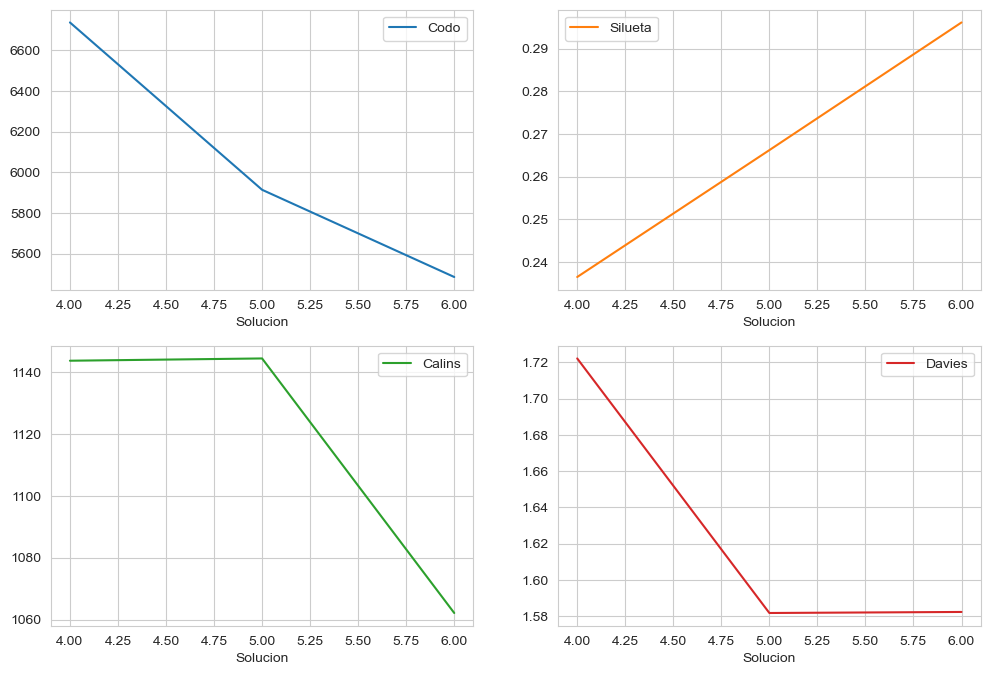

In [135]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

In [ ]:
'''
La segmentaci√≥n con TODAS las variables nos dice:

- CODO: Vemos un cambio de tendencia en el 5
- SILUETA: Buscamos el valor mas cercano a 1. 4 Clusters
- CALINS: Buscamos el valor mas alto. 5 Clusters
- DAVIES: Buscamos el valor mas bajo. 5 Clusters

'''

### 3.6. Segmentaci√≥n final con la mejor solucion

In [136]:
#Esto lo definiremos en funci√≥n de los resultados de las m√©tricas
mejor_solucion = 5

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=5, n_init=10)

## 4. EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validaci√≥n.

### 4.1. Calcular el segmento en entrenamiento y en validaci√≥n

In [137]:
df['segmento'] = cluster.predict(df)

In [138]:
#val_x['segmento'] = cluster.predict(val_x)

### 4.2. Comparar los perfiles

#### 4.2.1. Calcular los perfiles

In [139]:
perfiles_df = df.groupby('segmento').mean().T.stack().reset_index()
perfiles_df.columns = ['variable','segmento','media']

#perfiles_val = val_x.groupby('segmento').mean().T.stack().reset_index()
#perfiles_val.columns = ['variable','segmento','media']

In [140]:
perfiles_df

variable  segmento  media
0   ambito_Select         0   0.44
1   ambito_Select         1   0.67
2   ambito_Select         2   0.00
3   ambito_Select         3   0.00
4   ambito_Select         4   0.01
..            ...       ...    ...
85  otros_ambitos         0   0.08
86  otros_ambitos         1   0.07
87  otros_ambitos         2   0.27
88  otros_ambitos         3   0.17
89  otros_ambitos         4   0.11

[90 rows x 3 columns]

#### 4.2.2. Comparar los perfiles

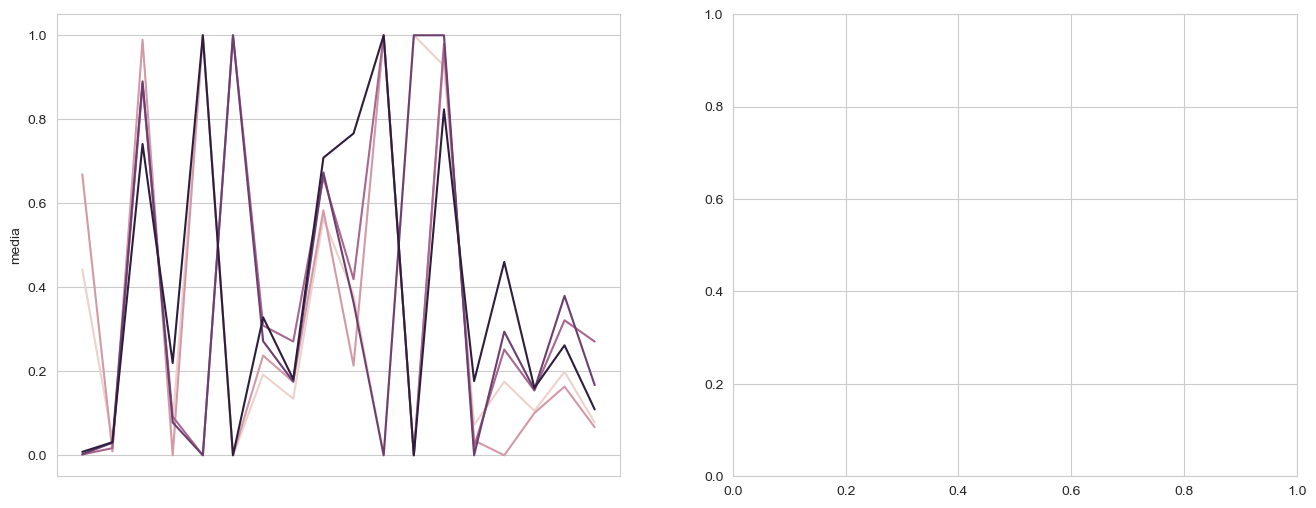

In [141]:
sns.set_style("whitegrid")

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

sns.lineplot(ax = ax[0], data = perfiles_df, x = 'variable', y = 'media', hue = 'segmento')
ax[0].get_legend().remove()
ax[0].axes.xaxis.set_visible(False)

#sns.lineplot(ax = ax[1], data = perfiles_val, x = 'variable', y = 'media', hue = 'segmento')
#ax[1].get_legend().remove()
#ax[1].axes.xaxis.set_visible(False)

## 5. PERFILAR LOS SEGMENTOS

In [142]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

In [ ]:
#An√°lisis con GPT: Le pasamos la tabla copy/paste y le pedimos que nos perfile los segmentos con conclusiones y estrateg√≠as
PERFILADO DE LOS 5 CLUSTERS

Cluster 0: Usuarios de tr√°fico directo con baja interacci√≥n y conversi√≥n media
    Fuente: Tr√°fico directo (100%)
    Ocupaci√≥n: Mayor√≠a desempleados (87.7%), pocos profesionales trabajando (7.8%)
    Interacci√≥n: Bajo tiempo en sitio (0.19) y pocas p√°ginas vistas (0.13)
    Descargas: Nadie descarga el material
    √Åmbitos: M√°s equilibrado en √°reas de administraci√≥n (17.5%) y recursos humanos (19.8%)
    Conversi√≥n: 38.2%
    üîπ Conclusi√≥n: Usuarios pasivos que llegan por tr√°fico directo y navegan poco. Conversi√≥n media.
    üìå Estrategia:
            Implementar retargeting en otras plataformas para mantener el contacto.
            Incentivar la descarga de contenido con lead magnets.

Cluster 1: Usuarios de tr√°fico org√°nico con muy baja conversi√≥n
    Fuente: Org√°nica (100%)
    Ocupaci√≥n: Mayor√≠a desempleados (98.9%)
    Interacci√≥n: Bajo tiempo en sitio (0.23), pocas p√°ginas vistas (0.17)
    Descargas: No descargan material
    √Åmbitos: Foco en recursos humanos (16.3%) y marketing (10%)
    Conversi√≥n: 21.3% (la m√°s baja)
    üîπ Conclusi√≥n: Llegan por b√∫squeda org√°nica, pero no se convierten.
    üìå Estrategia:
            Mejorar la optimizaci√≥n del sitio para retener usuarios.
            Agregar pop-ups o banners para captaci√≥n temprana.
            Incentivar pruebas gratuitas o formularios m√°s simples.

Cluster 2: Usuarios con mayor inter√©s y mejor perfil, pero conversi√≥n media
    Fuente: Org√°nica (100%)
    Ocupaci√≥n: 88.5% desempleados, pero m√°s profesionales trabajando (9.2%)
    Interacci√≥n: Mayor tiempo en sitio (0.30) y m√°s p√°ginas vistas (0.27)
    Descargas: 100% descargan material
    √Åmbitos: Alta afinidad por administraci√≥n y finanzas (25.1%) y recursos humanos (32.1%)
    Conversi√≥n: 41.9%
    üîπ Conclusi√≥n: Muestran mayor inter√©s, exploran m√°s el sitio y descargan recursos.
    üìå Estrategia:
            Implementar campa√±as de email marketing personalizadas.
            Crear contenidos exclusivos para usuarios con mayor interacci√≥n.
            Ofrecer asesor√≠as gratuitas para cerrar la conversi√≥n.

Cluster 3: Usuarios de tr√°fico directo con interacci√≥n media y conversi√≥n baja
    Fuente: Directa (100%)
    Ocupaci√≥n: 89% desempleados, 7.8% profesionales
    Interacci√≥n: Tiempo en sitio medio (0.27), p√°ginas vistas moderadas (0.17)
    Descargas: 100% descargan material
    √Åmbitos: M√°s inclinados a administraci√≥n y recursos humanos
    Conversi√≥n: 36.3%
    üîπ Conclusi√≥n: Usuarios que descargan material pero no terminan de convertir.
    üìå Estrategia:
            Implementar remarketing con correos y anuncios.
            Generar webinars o eventos en vivo para empujar la decisi√≥n.
            Ajustar llamados a la acci√≥n en la web.

Cluster 4: Usuarios altamente interesados con la mejor conversi√≥n
    Fuente: Org√°nica (100%)
    Ocupaci√≥n: Mayor proporci√≥n de profesionales (21.9%)
    Interacci√≥n: Mayor tiempo en sitio (0.32) y m√°s p√°ginas vistas (0.18)
    Descargas: No descargan material
    √Åmbitos: Administraci√≥n y finanzas (46%), recursos humanos (26%)
    Conversi√≥n: 76.6% (la m√°s alta)
    üîπ Conclusi√≥n: Usuarios muy calificados, con alta interacci√≥n y conversi√≥n.
    üìå Estrategia:
            Segmentar estos usuarios para detectar patrones y atraer m√°s.
            Crear estrategias de fidelizaci√≥n y referidos.
            Ofrecer paquetes premium o incentivos adicionales.
            
CONCLUSIONES GENERALES
‚úÖ La segmentaci√≥n en 5 clusters permite identificar claramente diferencias en fuentes de tr√°fico, nivel de inter√©s y 
conversi√≥n.
‚úÖ Los clusters 2 y 4 tienen el mejor perfil y deber√≠an ser priorizados en estrategias de conversi√≥n.
‚úÖ El cluster 1 muestra muy baja conversi√≥n y necesita optimizaci√≥n en la captaci√≥n.
‚úÖ El cluster 3 tiene potencial de conversi√≥n con una mejor estrategia de nurturing.

üìå Estrategias Clave
1Ô∏è‚É£ Optimizaci√≥n del Sitio: Mejorar UX para el cluster 1 y aumentar retenci√≥n.
2Ô∏è‚É£ Lead Nurturing: Personalizar emails para clusters 2 y 3.
3Ô∏è‚É£ Remarketing y Retargeting: Captar nuevamente a clusters 0 y 3.
4Ô∏è‚É£ Fidelizaci√≥n: Para cluster 4, enfocar en referidos y upselling.

üöÄ Acci√≥n R√°pida: Implementar una campa√±a de remarketing para clusters 2 y 3, combinando contenido premium y pruebas 
    gratuitas.

In [143]:
df

ambito_Select  ocupacion_Student  ocupacion_Unemployed  \
0              1.00               0.00                  1.00   
1              0.00               1.00                  0.00   
2              0.00               0.00                  1.00   
3              1.00               0.00                  1.00   
4              0.00               0.00                  1.00   
...             ...                ...                   ...   
4812           0.00               0.00                  1.00   
4813           1.00               0.00                  1.00   
4814           0.00               0.00                  1.00   
4815           0.00               0.00                  1.00   
4816           0.00               0.00                  1.00   

      ocupacion_Working Professional  descarga_lm_No  descarga_lm_Yes  \
0                               0.00            1.00             0.00   
1                               0.00            0.00             1.00   
2                               0.00            1.00             0.00   
3                               0.00            1.00             0.00   
4                               0.00            1.00             0.00   
...                              ...             ...              ...   
4812                            0.00            0.00             1.00   
4813                            0.00            1.00             0.00   
4814                            0.00            0.00             1.00   
4815                            0.00            1.00             0.00   
4816                            0.00            0.00             1.00   

      tiempo_en_site_total_mms  paginas_vistas_visita_mms  score_perfil_mms  \
0                         0.30                       0.16              0.44   
1                         0.67                       0.12              1.00   
2                         0.13                       0.06              0.67   
3                         0.63                       0.06              0.78   
4                         0.72                       0.12              1.00   
...                        ...                        ...               ...   
4812                      0.78                       0.12              1.00   
4813                      0.62                       0.16              0.67   
4814                      0.10                       0.12              0.89   
4815                      0.22                       0.19              0.56   
4816                      0.56                       0.19              0.78   

      compra  fuente_organica  fuente_directa  origen_digital  \
0          0             1.00            0.00            1.00   
1          1             0.00            1.00            1.00   
2          0             0.00            1.00            1.00   
3          1             1.00            0.00            1.00   
4          1             1.00            0.00            1.00   
...      ...              ...             ...             ...   
4812       0             0.00            1.00            1.00   
4813       1             0.00            1.00            1.00   
4814       0             0.00            1.00            1.00   
4815       1             1.00            0.00            1.00   
4816       1             0.00            1.00            1.00   

      origen_formulario  administracion_finanzas  marketing_publicidad  \
0                  0.00                     0.00                  0.00   
1                  0.00                     1.00                  0.00   
2                  0.00                     0.00                  1.00   
3                  0.00                     0.00                  0.00   
4                  0.00                     0.00                  0.00   
...                 ...                      ...                   ...   
4812               0.00                     0.00                  0.00   
4813               0.00               

In [147]:
df.segmento.value_counts(normalize=True, ascending=False)

segmento
1   0.27
3   0.26
4   0.21
0   0.15
2   0.11
Name: proportion, dtype: float64

In [ ]:
Cluster 0 representa el 15%: Conversi√≥n: 38.2%
Cluster 1 representa el 27%: Conversi√≥n: 21.3% (la m√°s baja)
Cluster 2 representa el 11%: Conversi√≥n: 41.9%
Cluster 3 representa el 26%: Conversi√≥n: 36.3%
Cluster 4 representa el 21%: Conversi√≥n: 76.6% (la m√°s alta)
        
Aqu√≠ lo que vemos es que tenemos diferentes tipos de calidad de leads:
    Leads de Alta calidad: 21% del total del cluster 4 que es el que mas conversi√≥n en compra tiene con un 76%
    Leads de Media calidad: 52% del total de los cluster 0, 2 y 3 que tienen una conversi√≥n media con un 38.8% de media
    Leads de Baja calidad: 27% del total del cluster 1 que es el que mas conversi√≥n en compra tiene con un 21.3%
        
Si tuvieramos much√≠simos leads generados (que suele ser el caso que nos sobran leads que los comerciales no pueden atender)
lo que har√≠amos ser√≠a priorizar los del cluster 4 y no pasarle a los comerciales los del cluster 1 para optimizar el tiempo
de los comerciales y que consiguieran mas ventas